In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import *

(train, test, valid), info = tfds.load('mnist', split = ['train[:80%]', 'train[80%:90%]', 'train[90%:]'], as_supervised = True, with_info = True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [2]:
resize = Sequential()
resize.add(Resizing(227,227))
resize.add(Rescaling(1./255))

In [3]:
train = train.map(lambda x, y: (resize(x, training = True), y))
test = test.map(lambda x, y: (resize(x, training = True), y))
valid = valid.map(lambda x, y: (resize(x, training = True), y))

In [4]:
train = train.map(lambda x, y: (tf.image.grayscale_to_rgb(x), y))
test = test.map(lambda x, y: (tf.image.grayscale_to_rgb(x), y))
valid = valid.map(lambda x, y: (tf.image.grayscale_to_rgb(x), y))

In [5]:
for image, label in train:
  print(image.shape)
  break

(227, 227, 3)


In [6]:
train = train.batch(32)
test = test.batch(32)
valid = valid.batch(32)

In [7]:
for bi, bl in train:
  for img, label in zip(bi, bl):
    print(img.shape)
    break
  break

(227, 227, 3)


In [8]:
model = Sequential()
model.add(Conv2D(filters = 96, kernel_size = 11, input_shape = (227, 227, 3), strides = 4, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3, strides = 2))
model.add(Conv2D(filters = 256, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 384, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same' ))
model.add(Conv2D(filters = 384, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same' ))
model.add(Conv2D(filters = 384, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same' ))
model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64896)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     265,818,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 290,896,130 (1.08 GB)

 Trainable params: 290,896,130 (1.08 GB)

 Non-trainable params: 0 (0.00 B)

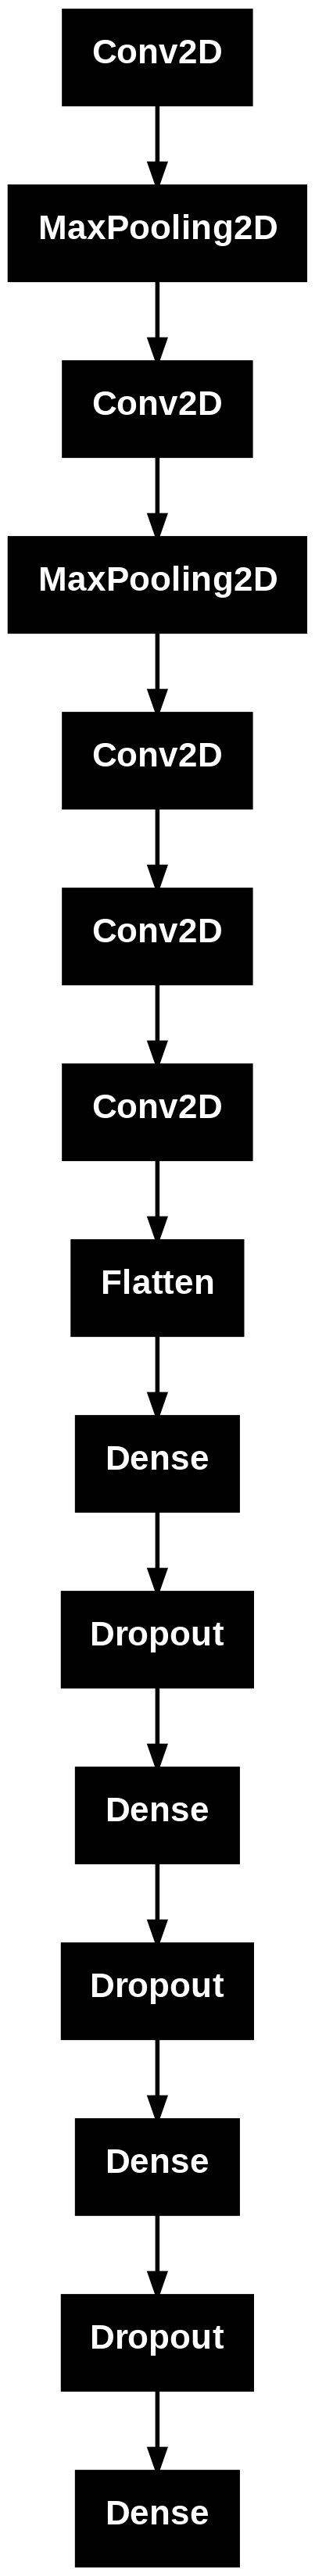

In [9]:
keras.utils.plot_model(model)

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'accuracy', patience = 3, verbose = 1, mode = 'auto')
history = model.fit(train, epochs = 5, validation_data = valid, callbacks = [es])

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 168s 103ms/step - accuracy: 0.8286 - loss: 0.6165 - val_accuracy: 0.9743 - val_loss: 0.1099
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 190s 102ms/step - accuracy: 0.9707 - loss: 0.1135 - val_accuracy: 0.9847 - val_loss: 0.0596
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 196s 98ms/step - accuracy: 0.9778 - loss: 0.0914 - val_accuracy: 0.9810 - val_loss: 0.0829
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 202s 99ms/step - accuracy: 0.9803 - loss: 0.0796 - val_accuracy: 0.9843 - val_loss: 0.0658
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 153s 102ms/step - accuracy: 0.9827 - loss: 0.0683 - val_accuracy: 0.9887 - val_loss: 0.0788


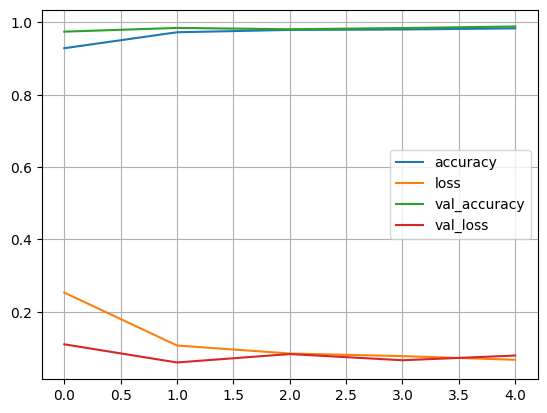

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [14]:
X_test, Y_test = next(iter(test))
print(X_test.shape)
print(Y_test.shape)

(32, 227, 227, 3)
(32,)


In [15]:
print(model.evaluate(test))
proba_y = model.predict(X_test[:10])
pred_y = np.argmax(proba_y, axis=1)

print(pred_y)

188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.9881 - loss: 0.0682
[0.07366809248924255, 0.9856666922569275]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[8 5 3 9 5 8 8 1 0 0]


In [16]:
print(proba_y.shape)

(10, 10)


In [17]:
print(pred_y.shape)

(10,)


In [18]:
Y_test[:10].shape

TensorShape([10])

In [19]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(pred_y, Y_test[:10])
print(conf)

[[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 1]]


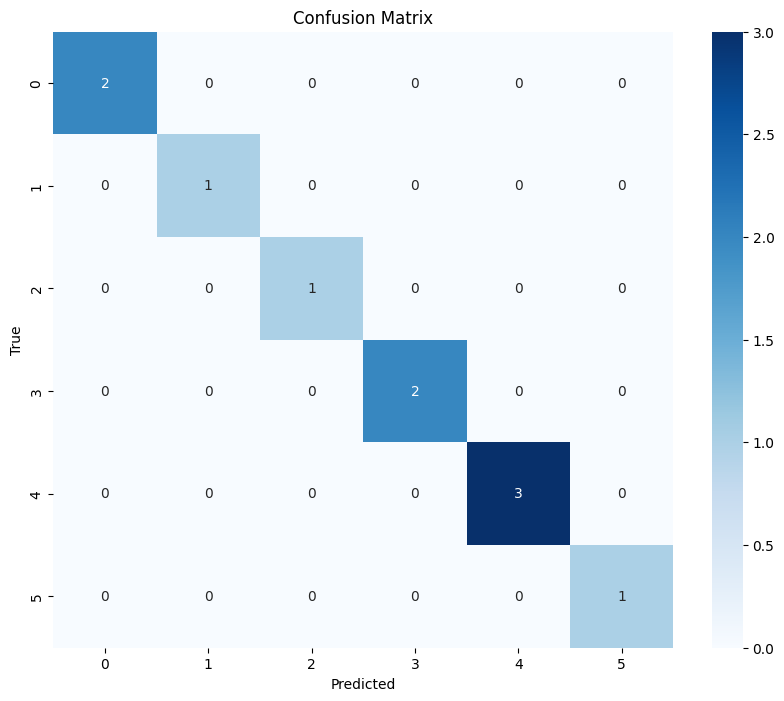

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()